# Softmax Classifier 1D

## Contents

1. Make some data
2. Build softmax classifier
3. Train the model
4. Analyze the results

In [1]:
# import libraies

import torch.nn as nn
import torch
import matplotlib.pyplot as plt 
import numpy as np
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

## Make some data

In [2]:
# Create dataset class

class Data(Dataset):
    
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[self.x[:, 0] < -0.2] = 1
        self.y[self.x[:, 0] > 0.2] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [3]:
dataset = Data()
dataset.y

tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2])

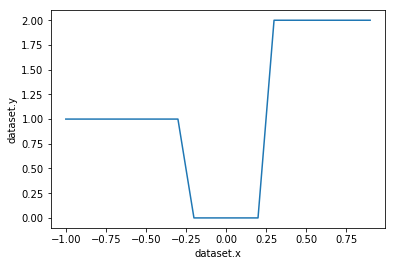

In [4]:
# plot the result 

plt.plot(dataset.x.numpy(), dataset.y.numpy())
plt.xlabel('dataset.x')
plt.ylabel('dataset.y')
plt.show()

## 2. Build softmax classifier

In [5]:
# only need nn.Linear

model = nn.Sequential(nn.Linear(1, 3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5153],
                      [-0.4414],
                      [-0.1939]])),
             ('0.bias', tensor([ 0.4694, -0.9414,  0.5997]))])

## 3. Train the model

In [6]:
# Create criterion, optimizer, dataloader

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
trainloader = DataLoader(dataset=dataset, batch_size=5)

In [7]:
# Train the model

LOSS = []

def train_model(epochs):
    
    for epoch in range(epochs):
        
        tmp = 0
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            tmp += loss.item()
            loss.backward()
            optimizer.step()
        LOSS.append(tmp)
train_model(500)

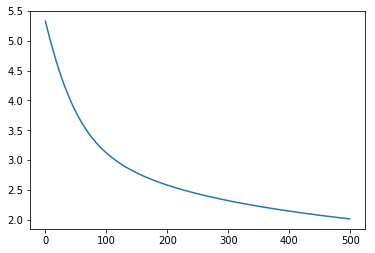

In [8]:
plt.plot(LOSS)

## 4. Analyze the result

In [9]:
# make a prediction

z = model(dataset.x)

_, yhat = torch.max(z, 1)
print("The prediction: ", yhat)

The prediction:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [10]:
# Print the accuracy

corrent = (dataset.y == yhat).sum().item()
accuracy = corrent / len(dataset)
print("The accuracy：", accuracy)

The accuracy： 0.8


In [11]:
# softmax function convert output to probability

softmax_fn = nn.Softmax(dim=1) # dim=1 按行softmax； dim=0 按列进行softmax
probability = softmax_fn(z)

In [12]:
probability

tensor([[0.0741, 0.9156, 0.0103],
        [0.0938, 0.8903, 0.0159],
        [0.1178, 0.8581, 0.0242],
        [0.1461, 0.8175, 0.0364],
        [0.1786, 0.7674, 0.0540],
        [0.2144, 0.7070, 0.0787],
        [0.2514, 0.6367, 0.1119],
        [0.2869, 0.5580, 0.1551],
        [0.3176, 0.4741, 0.2083],
        [0.3399, 0.3896, 0.2705],
        [0.3513, 0.3093, 0.3394],
        [0.3511, 0.2373, 0.4116],
        [0.3399, 0.1764, 0.4837],
        [0.3200, 0.1275, 0.5525],
        [0.2940, 0.0899, 0.6161],
        [0.2647, 0.0622, 0.6732],
        [0.2343, 0.0423, 0.7234],
        [0.2047, 0.0284, 0.7669],
        [0.1769, 0.0188, 0.8043],
        [0.1515, 0.0124, 0.8361]], grad_fn=<SoftmaxBackward>)